In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import IsolationForest

In [3]:
np.random.seed(42)

In [4]:
normal_data = np.random.normal(loc=50,scale=5,size=(100,2))

In [6]:
normal_data

In [12]:
anomaly_data = np.random.uniform(low=70,high=100,size=(10,2))

In [10]:
anomaly_data


In [15]:
data = np.vstack((normal_data,anomaly_data))
df = pd.DataFrame(data,columns=['Feature1','Feature2'])

In [21]:
model = IsolationForest(contamination=0.1,random_state=42)
df['anomaly'] = model.fit_predict(df[['Feature1','Feature2']])

In [23]:
df['anomaly'] = df['anomaly'].map({1:0,-1:1})

In [24]:
df['anomaly']

0      0
1      0
2      0
3      0
4      0
      ..
105    1
106    1
107    1
108    1
109    1
Name: anomaly, Length: 110, dtype: int64

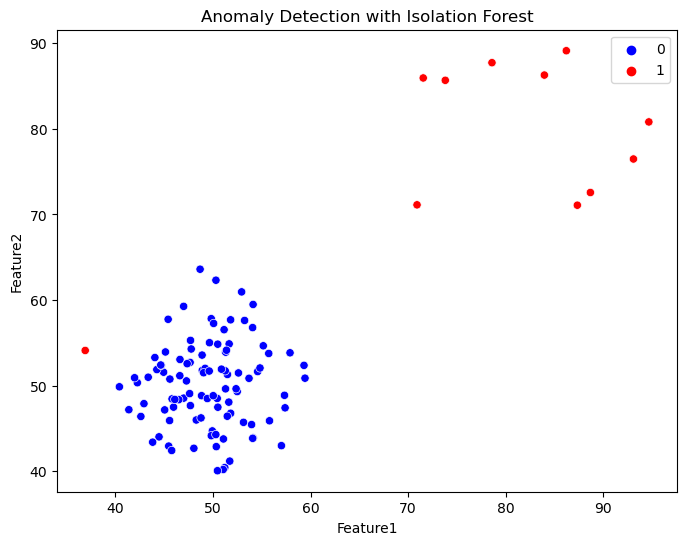

In [29]:
#  visulaize
plt.figure(figsize=(8,6))
sns.scatterplot(x='Feature1',y='Feature2',hue='anomaly',data=df,palette={0:'blue',1:'red'})
plt.title("Anomaly Detection with Isolation Forest")
plt.legend()
plt.show()